In [54]:
import pandas as pd

In [55]:
KY = pd.read_csv("https://datajournalism.tech/wp-content/uploads/2019/12/ky_17.csv")

In [56]:
KY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29287 entries, 0 to 29286
Data columns (total 33 columns):
Unnamed: 0                  29287 non-null int64
raw_row_number              29287 non-null object
date                        29287 non-null object
time                        29287 non-null object
location                    29287 non-null object
lat                         29209 non-null float64
lng                         29209 non-null float64
beat                        28478 non-null object
division                    28478 non-null object
subject_age                 20512 non-null float64
subject_race                29286 non-null object
subject_sex                 29287 non-null object
officer_race                29266 non-null object
officer_sex                 29266 non-null object
type                        29287 non-null object
violation                   20519 non-null object
citation_issued             29287 non-null bool
warning_issued              29287 non-nul

In [57]:
KY.head()

,Unnamed: 0,raw_row_number,date,time,location,lat,lng,beat,division,subject_age,...,raw_activity_division,raw_division,raw_activity_beat,raw_beat,raw_driver_race,raw_persons_race,raw_persons_ethnicity,raw_driver_age_range,raw_was_vehcile_searched,raw_citation_location
0,1,18736,2017-01-02,19:40:00,OTERLOOP AND JUDGE BLVD,38.137823,-85.669383,BEAT 5,7TH DIVISION,NaN,...,-TH DIVISION,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN
1,2,18737,2017-01-02,21:32:00,28OO OUTERLOOP,38.136293,-85.712025,BEAT 6,7TH DIVISION,NaN,...,-TH DIVISION,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,YES,NaN
2,3,18738,2017-01-02,23:43:00,PRESTON AND MILES,38.124274,-85.679036,BEAT 6,7TH DIVISION,NaN,...,-TH DIVISION,NaN,BEAT -,NaN,BLACK,NaN,NaN,-- - --,NO,NaN
3,4,18739,2017-01-04,02:00:00,BARDSTOWN/EASTVIEW,38.221953,-85.682547,BEAT 4,5TH DIVISION,NaN,...,-TH DIVISION,NaN,BEAT -,NaN,ASIAN/PACIFIC ISLANDER,NaN,NaN,OVER --,NO,NaN
4,5,18741,2017-01-12,02:07:00,PRESTON HWY / MILES LANE,38.124374,-85.679231,BEAT 6,7TH DIVISION,NaN,...,-TH DIVISION,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN


In [58]:
population = pd.DataFrame({"subject_race":["white", "black", "asian/pacific islander", "hispanic"], "num_people": [409519,140979,15879,31717]},columns=["subject_race","num_people"])

In [59]:
population.head()

,subject_race,num_people
0,white,409519
1,black,140979
2,asian/pacific islander,15879
3,hispanic,31717


In [60]:
stops = pd.merge(KY, population, on="subject_race")

In [61]:
stops.head()

,Unnamed: 0,raw_row_number,date,time,location,lat,lng,beat,division,subject_age,...,raw_division,raw_activity_beat,raw_beat,raw_driver_race,raw_persons_race,raw_persons_ethnicity,raw_driver_age_range,raw_was_vehcile_searched,raw_citation_location,num_people
0,1,18736,2017-01-02,19:40:00,OTERLOOP AND JUDGE BLVD,38.137823,-85.669383,BEAT 5,7TH DIVISION,NaN,...,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN,409519
1,2,18737,2017-01-02,21:32:00,28OO OUTERLOOP,38.136293,-85.712025,BEAT 6,7TH DIVISION,NaN,...,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,YES,NaN,409519
2,5,18741,2017-01-12,02:07:00,PRESTON HWY / MILES LANE,38.124374,-85.679231,BEAT 6,7TH DIVISION,NaN,...,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN,409519
3,6,18742,2017-01-12,23:02:00,S 2ND/W MUHAMMAD ALI,38.250853,-85.754599,BEAT 3,1ST DIVISION,NaN,...,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN,409519
4,8,18745,2017-01-15,09:30:00,FRANKFORT/EWING,38.253846,-85.699797,BEAT 1,5TH DIVISION,NaN,...,NaN,BEAT -,NaN,WHITE,NaN,NaN,-- - --,NO,NaN,409519


In [62]:
race=KY.subject_race.value_counts().reset_index()

In [63]:
race = race.rename(columns={"index": "subject_race", "subject_race": "count"})

In [64]:
stops = pd.merge(race, population, on= "subject_race")

In [65]:
stops

,subject_race,count,num_people
0,white,17812,409519
1,black,9401,140979
2,hispanic,1488,31717
3,asian/pacific islander,361,15879


In [66]:
stops["stop_rate"]=stops["count"]/stops["num_people"]


In [67]:
stops

,subject_race,count,num_people,stop_rate
0,white,17812,409519,0.043495
1,black,9401,140979,0.066684
2,hispanic,1488,31717,0.046915
3,asian/pacific islander,361,15879,0.022734


In [68]:
%matplotlib inline

[Text(0,0,'white'),
 Text(0,0,'black'),
 Text(0,0,'hispanic'),
 Text(0,0,'asian/pacific islander')]

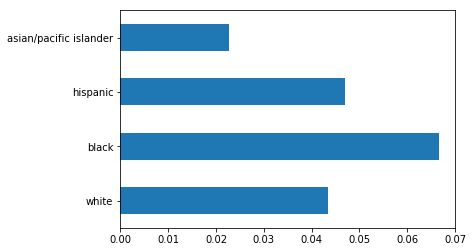

In [69]:
chart=stops.stop_rate.plot.barh()
chart.set_yticklabels(stops.subject_race)

In [70]:
stops.to_csv("stops.csv")

In [71]:
new = stops.drop(["num_people", "count"], axis=1)

In [72]:
stops.to_csv("stops.csv")